In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [53]:
df = pd.read_csv('titanic_train.csv')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
x1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()

In [57]:
x2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

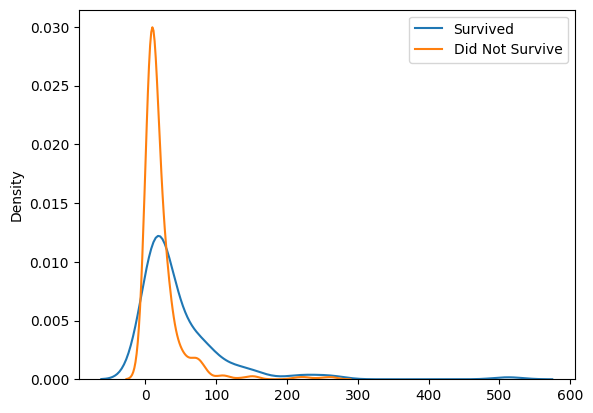

In [58]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did Not Survive')
plt.legend();

In [59]:
x1.mean(), x2.mean()

(np.float64(48.39540760233918), np.float64(22.117886885245902))

In [60]:
ztest(x1, x2, usevar='unequal')

(np.float64(6.839099259085254), np.float64(7.969265634477824e-12))

In [61]:
# Verify with above code
# two-sample test implementation
N0 = len(x1)
N1 = len(x2)
mu_hat0 = x1.mean()
mu_hat1 = x2.mean()
dmu_hat = mu_hat1 - mu_hat0
s2_hat0 = x1.var(ddof=1)
s2_hat1 = x2.var(ddof=1)
s_hat = np.sqrt(s2_hat0 / N0 + s2_hat1 / N1)
z = dmu_hat / s_hat # reference value is 0
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left
z, p

(np.float64(-6.839099259085254), np.float64(7.969223252618599e-12))